In [1]:
%matplotlib inline
# This turns on inline plotting, where plot graphics will appear in your notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Importing image data into Numpy arrays

Loading image data is supported by the `Pillow` library. Natively, matplotlib only supports **PNG images**. The commands shown below fall back on Pillow if the native read fails.

In [3]:
img = mpimg.imread('stinkbug.png')
print(img.shape)
print(img.dtype)
print(type(img))

(585, 782, 4)
float32
<class 'numpy.ndarray'>


For **PNG image**, Matplotlib has **rescaled** the 8 bit data from each channel to floating point data between 0.0 and 1.0. As a side note, the only datatype that **Pillow** can work with is **uint8**. **Matplotlib plotting** can handle **float32 and uint8**, but **image reading/writing** for any format other than PNG is limited to uint8 data. 

For **RGB and RGBA images**, matplotlib supports **float32 and uint8** data types. For **grayscale**, matplotlib supports only **float32**. If your array data does not meet one of these descriptions, you need to rescale it.

# Plotting numpy arrays as images
Render iamge using the `imshow()` function to show the numpy array image.

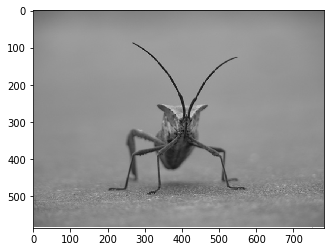

In [4]:
imgplot = plt.imshow(img)

## Applying pseudocolor schemes to image plots
Pseudocolor can be a useful tool for **enhancing contrast and visualizing your data more easily**.

**Pseudocolor is only relevant to single-channel**, grayscale, luminosity images. We currently have an RGB image.

In [5]:
lum_img = img[:,:,0]

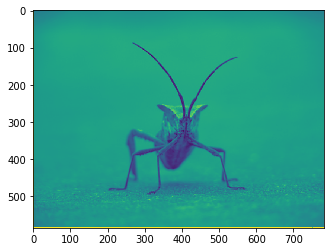

In [6]:
plt.imshow(lum_img)

Now, with a **luminosity (2D, no color) image**, the **default colormap** (aka lookup table, LUT), is applied. The default is called **viridis**. There are plenty of others to choose from.

You can also **change colormaps** on existing plot objects using the `set_cmap()` method:

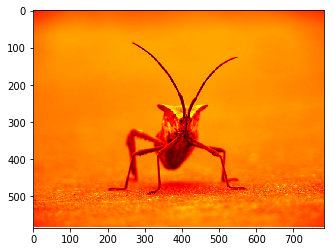

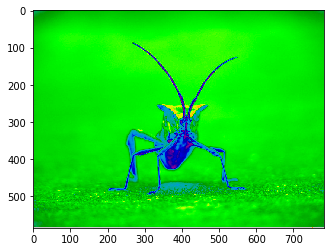

In [7]:
plt.figure()
plt.imshow(lum_img, cmap='hot')
plt.figure()
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

## Color scale reference

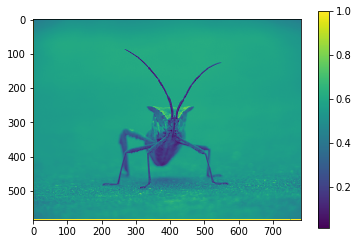

In [8]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

## Examining a specific data range

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 3.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00,
        4.0000e+00, 1.4000e+01, 7.0000e+00, 9.0000e+00, 3.6000e+01,
        2.7000e+01, 3.5000e+01, 5.2000e+01, 5.1000e+01, 6.1000e+01,
        5.5000e+01, 6.4000e+01, 8.0000e+01, 1.1800e+02, 1.4100e+02,
        1.2600e+02, 1.3300e+02, 1.6100e+02, 1.5900e+02, 1.9300e+02,
        2.0200e+02, 2.5400e+02, 2.4300e+02, 2.5900e+02, 2.4900e+02,
        2.4500e+02, 2.7900e+02, 3.0100e+02, 3.1600e+02, 2.9500e+02,
        2.8000e+02, 2.8800e+02, 3.1800e+02, 3.0900e+02, 2.5700e+02,
        2.8900e+02, 2.5000e+02, 2.4900e+02, 2.6500e+02, 2.3800e+02,
        2.7700e+02, 2.7700e+02, 2.6500e+02, 2.6000e+02, 2.7400e+02,
        2.9500e+02, 2.9900e+02, 3.3200e+02, 3.1600e+02, 3.2100e+02,
        3.2900e+02, 3.4200e+02, 3.1600e+02, 3.1400e+02, 3.2400e+02,
        2.9400e+02, 2.9200e+02, 2.9900e+02, 3.41

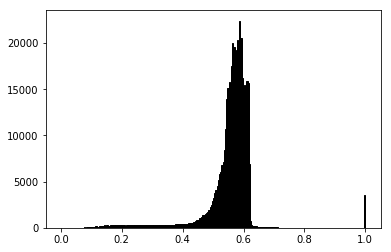

In [9]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

In our histogram, it looks like there’s not much useful information in the high end (not many white things in the image). Let’s **adjust the upper limit**, so that we effectively “zoom in on” part of the histogram.

- pass the clim argument to imshow
- call the `set_clim()` method of the image plot object

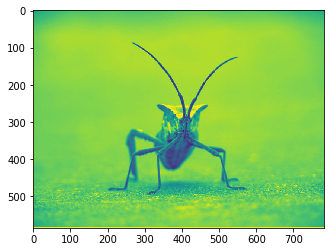

In [10]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

## Array interpolation schemes
**Interpolation calculates what the color or value of a pixel “should” be**, according to different mathematical schemes.

One common place that this happens is when you **resize an image**. The number of pixels change, but you want the same information. Since pixels are discrete, there’s missing space. **Interpolation is how you fill that space.**

### Use Pillow library to load the image and resize it.

<class 'PIL.PngImagePlugin.PngImageFile'>


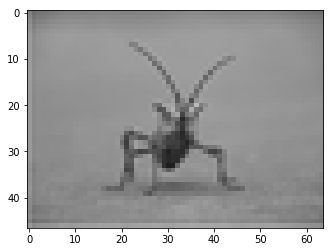

In [11]:
from PIL import Image
img = Image.open('stinkbug.png')
img.thumbnail((64, 64), Image.ANTIALIAS)
print(type(img))
imgplot = plt.imshow(img)

**Pillow** read image in a **Unit8** data type.

In [12]:
np_img = np.array(img)
print(np_img)

[[[128 128 128 255]
  [109 109 109 255]
  [116 116 116 255]
  ...
  [118 118 118 255]
  [116 116 116 255]
  [114 114 114 255]]

 [[133 133 133 255]
  [115 115 115 255]
  [122 122 122 255]
  ...
  [124 124 124 255]
  [122 122 122 255]
  [121 121 121 255]]

 [[139 139 139 255]
  [122 122 122 255]
  [129 129 129 255]
  ...
  [131 131 131 255]
  [129 129 129 255]
  [127 127 127 255]]

 ...

 [[140 140 140 255]
  [125 125 125 255]
  [128 128 128 255]
  ...
  [132 132 132 255]
  [129 129 129 255]
  [119 119 119 255]]

 [[128 128 128 255]
  [109 109 109 255]
  [117 117 117 255]
  ...
  [119 119 119 255]
  [115 115 115 255]
  [113 113 113 255]]

 [[153 153 153 255]
  [138 138 138 255]
  [145 145 145 255]
  ...
  [144 144 144 255]
  [144 144 144 255]
  [143 143 143 255]]]


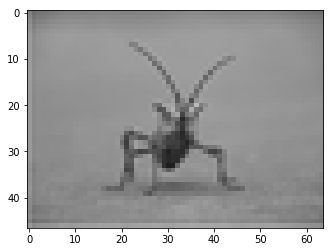

In [13]:
imgplot = plt.imshow(img, interpolation="nearest")

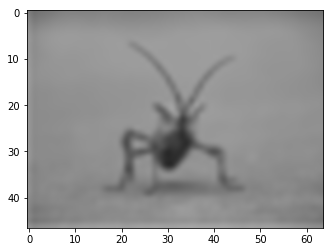

In [14]:
imgplot = plt.imshow(img, interpolation="bicubic")